In this section we are going to implement Ramndom Sampling Imputation, Before we were filling missing values by taking the mean or median of a particular column and fill those missing values (NA) with MEAN/MEADIAN.

BUT In this approach we take the random observation from a paticular column and fill the missing values with random values 
By this we GURANTEE THAT MEAN & STD OF VARIABLE ARE PRESERVING 

But this approach dosn't use much because of it's random nature BUT agian this approach has advatages over mean/median as it preserve the distribution of variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score ,classification_report ,confusion_matrix

Here we are using Titanic dataset

In [2]:
titanic = pd.read_csv('/Users/nandrajog/Downloads/titanic.csv',low_memory=False)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
croped_titanic = titanic[['Age','Fare','Survived']]

In [5]:
croped_titanic.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [6]:
pd.DataFrame(croped_titanic.isna().mean())

,0
Age,0.198653
Fare,0.000000
Survived,0.000000


In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(croped_titanic,
                                                 croped_titanic.Survived,train_size = 0.7,random_state=0)

print(X_train.shape)

(623, 3)


In [8]:
median = X_train.Age.median()
print("median",median)
mean = X_train.Age.mean()
print("mean",mean)


median 29.0
mean 29.915338645418327


In [9]:
def Imutation_na(df,col,median,mean):
    df[col+'_median'] = df[col].fillna(median)
    df[col+'_zero'] = df[col].fillna(0)
    df[col+'_mean'] = df[col].fillna(mean).round(1)
    
    #Random Sampling
    values = df[col].dropna()
    random_value = np.random.choice(values.values,replace=False)
    df[col+'_random'] = df[col].fillna(random_value)
    
#     random_sample = df[col].dropna().sample(df[col].isnull().sum(),random_state =0)
#     random_sample.index = df[df[col].isnull()].index
#     df.loc[df[col].isnull(),col+'_random'] = random_sample

In [10]:
mean = X_test.Age.mean()
median = X_test.Age.median()

In [11]:
Imutation_na(X_train,'Age',median,mean)
Imutation_na(X_test,'Age',median,mean)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [12]:
# values = X_train['Age'].dropna()

In [13]:
# np.random.choice(values.values)

In [14]:
# np.random.shuffle([[1,10,3],[2,3,4]])

In [15]:
# array

In [16]:
# type(array)from random import randrange

In [17]:
# np.random.shuffle(array)



In [18]:
# np.random.random

In [19]:
X_train

,Age,Fare,Survived,Age_median,Age_zero,Age_mean,Age_random
857,51.0,26.5500,1,51.0,51.0,51.0,51.0
52,49.0,76.7292,1,49.0,49.0,49.0,49.0
386,1.0,46.9000,0,1.0,1.0,1.0,1.0
124,54.0,77.2875,0,54.0,54.0,54.0,54.0
578,NaN,14.4583,0,27.0,0.0,29.2,18.0
...,...,...,...,...,...,...,...
835,39.0,83.1583,1,39.0,39.0,39.0,39.0
192,19.0,7.8542,1,19.0,19.0,19.0,19.0
629,NaN,7.7333,0,27.0,0.0,29.2,18.0
559,36.0,17.4000,1,36.0,36.0,36.0,36.0


In [20]:
X_test

,Age,Fare,Survived,Age_median,Age_zero,Age_mean,Age_random
495,NaN,14.4583,0,27.0,0.0,29.2,54.0
648,NaN,7.5500,0,27.0,0.0,29.2,54.0
278,7.0,29.1250,0,7.0,7.0,7.0,7.0
31,NaN,146.5208,1,27.0,0.0,29.2,54.0
255,29.0,15.2458,1,29.0,29.0,29.0,29.0
...,...,...,...,...,...,...,...
263,40.0,0.0000,0,40.0,40.0,40.0,40.0
718,NaN,15.5000,0,27.0,0.0,29.2,54.0
620,27.0,14.4542,0,27.0,27.0,27.0,27.0
786,18.0,7.4958,1,18.0,18.0,18.0,18.0


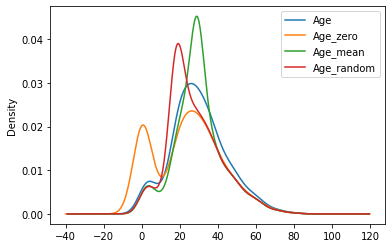

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind = 'kde',ax=ax)
X_train['Age_zero'].plot(kind='kde',ax=ax)
X_train['Age_mean'].plot(kind='kde',ax=ax)
X_train['Age_random'].plot(kind='kde',ax=ax)
lines,lables = ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

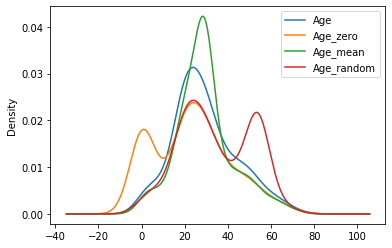

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_test['Age'].plot(kind = 'kde',ax=ax)
X_test['Age_zero'].plot(kind='kde',ax=ax)
X_test['Age_mean'].plot(kind='kde',ax=ax)
X_test['Age_random'].plot(kind='kde',ax=ax)
lines,lables = ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

In [23]:
X_train.columns

Index(['Age', 'Fare', 'Survived', 'Age_median', 'Age_zero', 'Age_mean',
       'Age_random'],
      dtype='object')

In [24]:
X_train.Survived

857    1
52     1
386    0
124    0
578    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 623, dtype: int64

In [25]:
X_train_zero = X_train[['Fare','Age_zero']]

In [26]:
X_train_zero

,Fare,Age_zero
857,26.5500,51.0
52,76.7292,49.0
386,46.9000,1.0
124,77.2875,54.0
578,14.4583,0.0
...,...,...
835,83.1583,39.0
192,7.8542,19.0
629,7.7333,0.0
559,17.4000,36.0


In [27]:
X_train_zero

,Fare,Age_zero
857,26.5500,51.0
52,76.7292,49.0
386,46.9000,1.0
124,77.2875,54.0
578,14.4583,0.0
...,...,...
835,83.1583,39.0
192,7.8542,19.0
629,7.7333,0.0
559,17.4000,36.0


In [28]:
X_test_zero = X_test[['Fare','Age_zero']]

In [29]:
clf_logistic_regression = LogisticRegression(C= 100,random_state=44)
print("Train with Zero Imputation")
clf_logistic_regression.fit(X_train_zero,X_train.Survived)
score = clf_logistic_regression.score(X_train_zero,X_train.Survived)
print("Score with Zero Imputation {}".format(score))
predictions_train= clf_logistic_regression.predict(X_train_zero)
print("Roc_auc_score  with Zero Imputation  on Train set {}".format(confusion_matrix(Y_train,predictions_train)))

predictions= clf_logistic_regression.predict(X_test_zero)
print("Roc_auc_score with Zero Imputation  on Test set {}".format(roc_auc_score(Y_test,predictions)))

Train with Zero Imputation
Score with Zero Imputation 0.651685393258427
Roc_auc_score  with Zero Imputation  on Train set [[353  28]
 [189  53]]
Roc_auc_score with Zero Imputation  on Test set 0.6041666666666667


/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
X_train_median = X_train[['Fare','Age_median']]
X_test_median = X_test[['Fare','Age_median']]

In [31]:
clf_logistic_regression = LogisticRegression(C= 100,random_state=44)
print("Train with Median Imputation")
clf_logistic_regression.fit(X_train_median,X_train.Survived)
score = clf_logistic_regression.score(X_train_median,X_train.Survived)
print("Score with Median Imputation {}".format(score))
predictions_train= clf_logistic_regression.predict_proba(X_train_median)[:,1]
print("Roc_auc_score with Median Imputation  on Train set {}".format(roc_auc_score(Y_train,predictions_train)))

predictions= clf_logistic_regression.predict_proba(X_test_median)[:,1]
print("Roc_auc_score with Median Imputation  on Test set {}".format(roc_auc_score(Y_test,predictions)))

Train with Median Imputation
Score with Median Imputation 0.6404494382022472
Roc_auc_score with Median Imputation  on Train set 0.6788410229713022
Roc_auc_score with Median Imputation  on Test set 0.7270833333333333


/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
X_train_mean = X_train[['Fare','Age_mean']]
X_test_mean =X_test[['Fare','Age_mean']]

In [33]:
clf_logistic_regression = LogisticRegression(C= 100,random_state=44)
print("Train with Mean Imputation")
clf_logistic_regression.fit(X_train_mean,X_train.Survived)
score = clf_logistic_regression.score(X_train_mean,X_train.Survived)
print("Score with Mean Imputation {}".format(score))
predictions_train= clf_logistic_regression.predict_proba(X_train_mean)[:,1]
print("Roc_auc_score with Mean Imputation  on Train set {}".format(roc_auc_score(Y_train,predictions_train)))

predictions= clf_logistic_regression.predict(X_test_mean)
print("Roc_auc_score with Mean Imputation  on Test set {}".format(roc_auc_score(Y_test,predictions)))

Train with Mean Imputation


/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score with Mean Imputation 0.6388443017656501
Roc_auc_score with Mean Imputation  on Train set 0.6795893798399167
Roc_auc_score with Mean Imputation  on Test set 0.5961904761904762


In [34]:
X_train_random = X_train[['Fare','Age_random']]
X_test_random =X_test[['Fare','Age_random']]

In [36]:
clf_logistic_regression = LogisticRegression(C= 100,random_state=44)
print("Train with Random Imputation")
clf_logistic_regression.fit(X_train_random,X_train.Survived)
score = clf_logistic_regression.score(X_train_random,X_train.Survived)
print("Score with Random Imputation {}".format(score))
predictions_train= clf_logistic_regression.predict_proba(X_train_random)[:,1]
print("Roc_auc_score with Random Imputation  on Train set {}".format(roc_auc_score(Y_train,predictions_train)))

predictions= clf_logistic_regression.predict(X_test_random)
print("Roc_auc_score with Random Imputation  on Test set {}".format(roc_auc_score(Y_test,predictions)))

Train with Random Imputation
Score with Random Imputation 0.6420545746388443
Roc_auc_score with Random Imputation  on Train set 0.682994945879699
Roc_auc_score with Random Imputation  on Test set 0.6021428571428572


/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Which Imputation we should choose?

1) Mean

2) Zero

3) Random

4) Median

There is No correct answer for this question. I would suggest to chose all one by one and check the score of algorithm or use Cross validation to check the Performance of Algorithm

